In [ ]:
#McCurr Healthcare Consultancy is an MNC that has thousands of employees spread out across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target them with incentives.

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64
****************************************
OverTime
No     0.717007
Yes    0.282993
Name: proportion, dtype: float64
****************************************
BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64
****************************************
Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64
****************************************
Education
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: proportion, dtype: float64
****************************************
EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64
************************

,Attrition,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,41,1102,1,94,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
1,0,49,279,8,61,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False
2,1,37,1373,2,92,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,0,33,1392,3,56,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,0,27,591,2,40,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


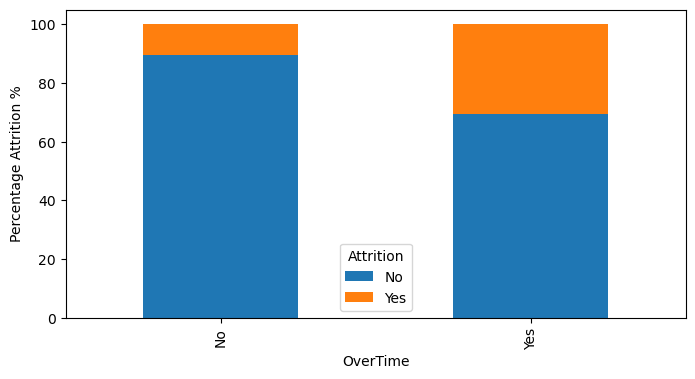

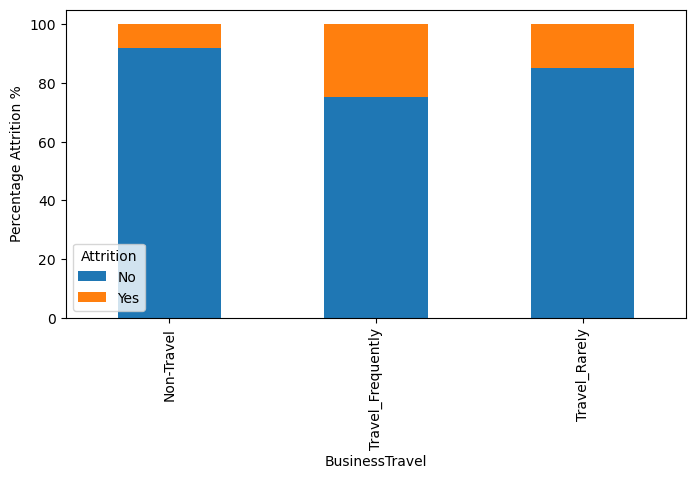

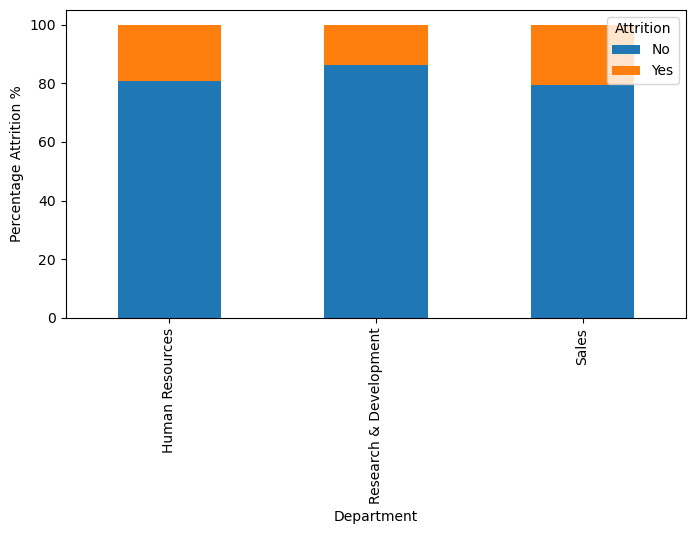

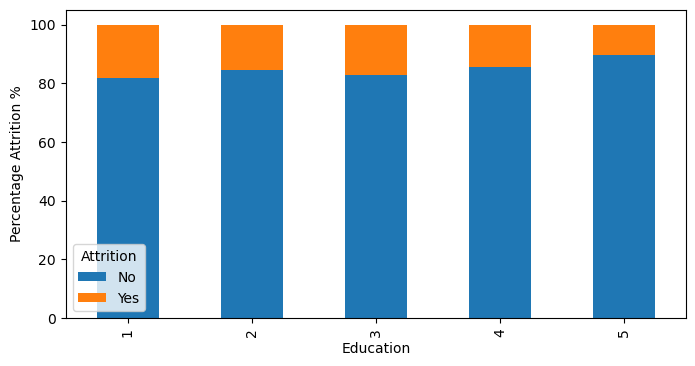

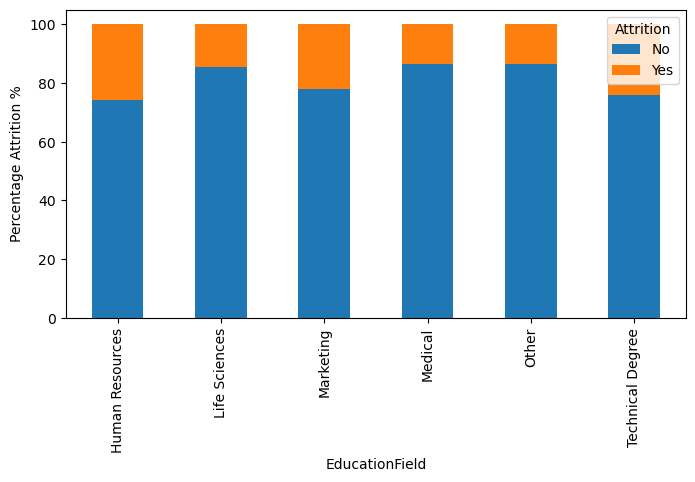

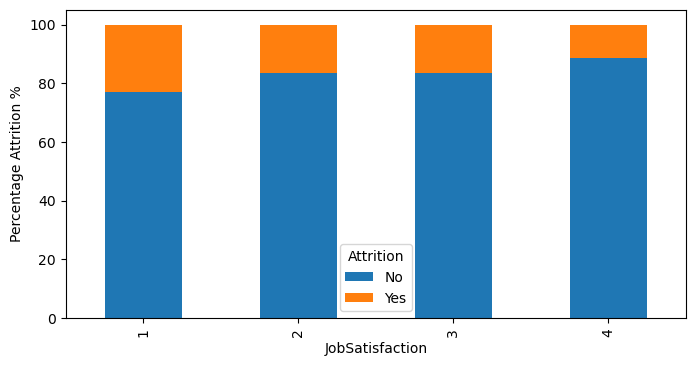

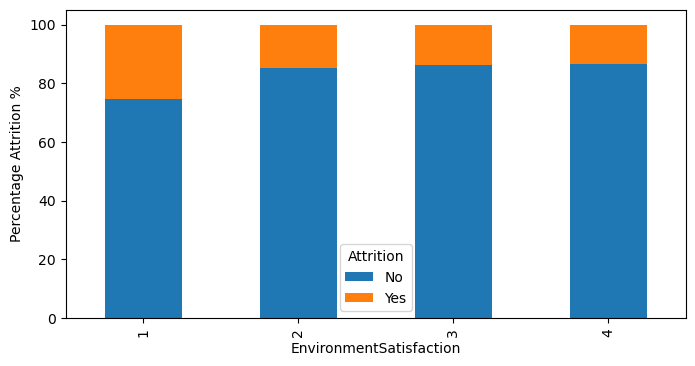

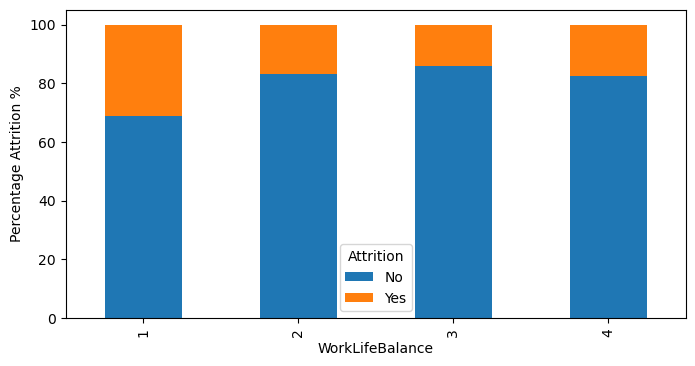

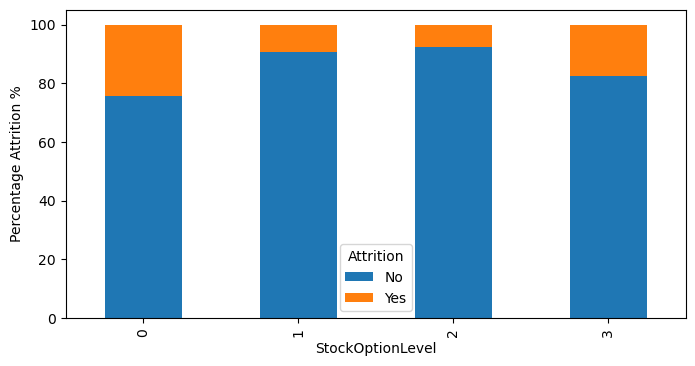

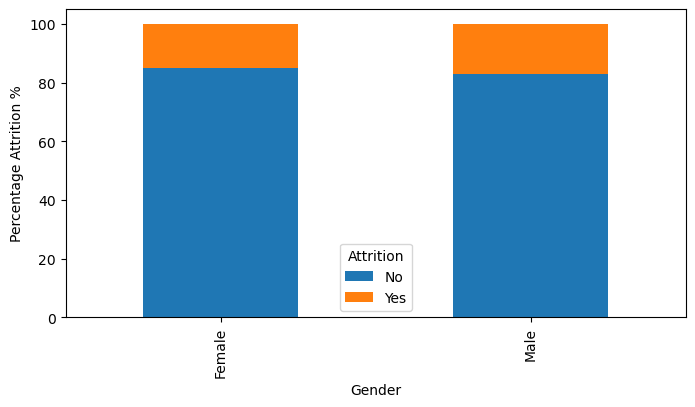

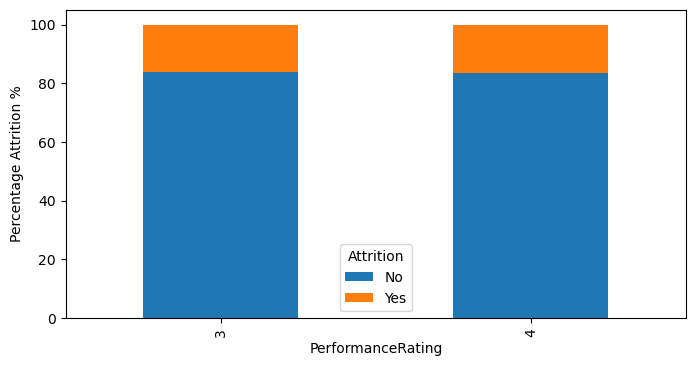

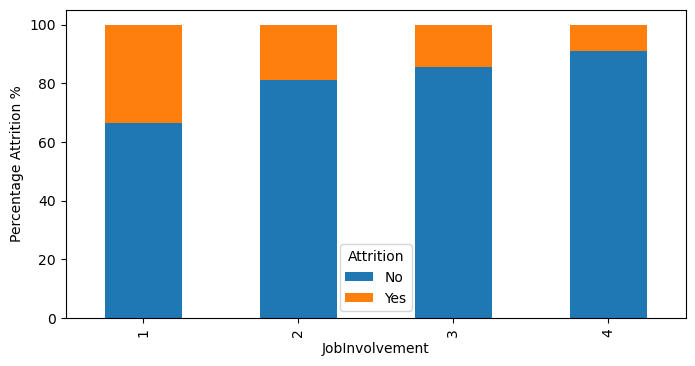

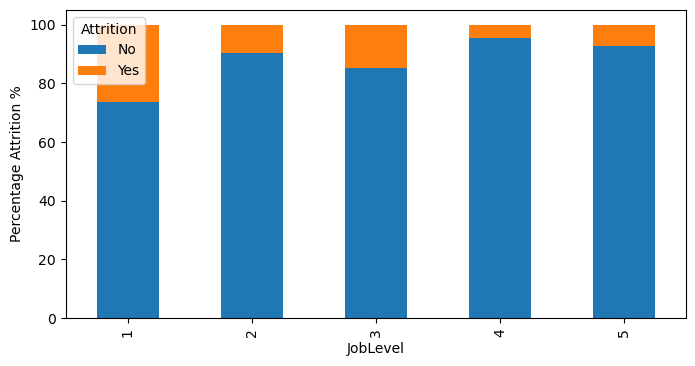

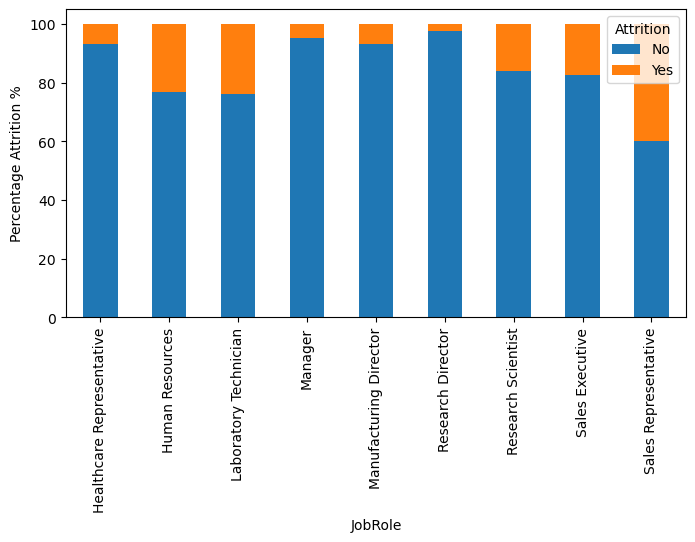

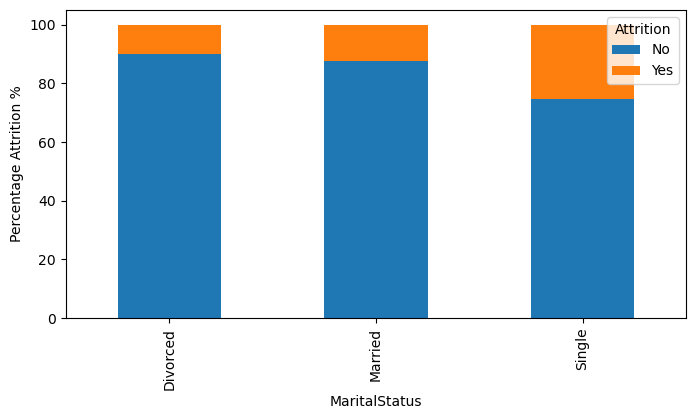

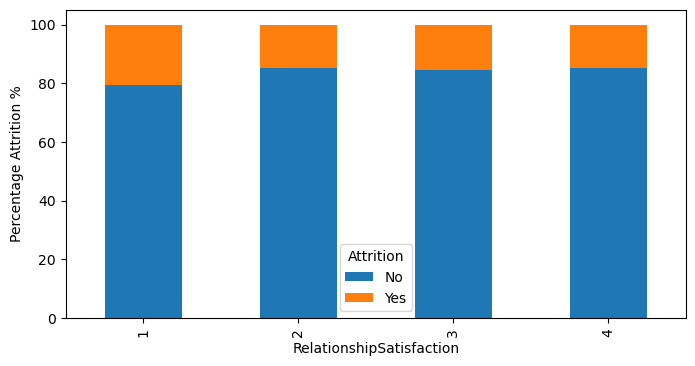

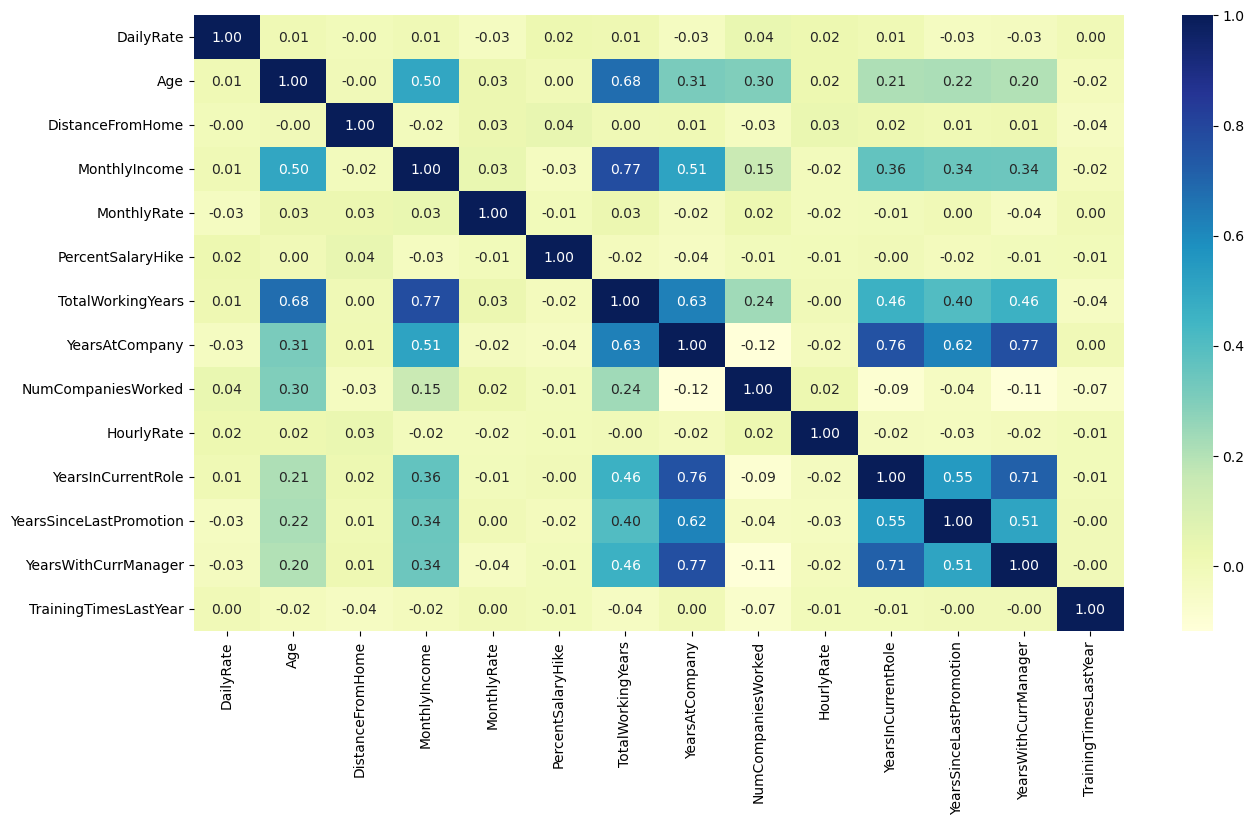

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
#to scale data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
#for tuning the model
from sklearn.model_selection import GridSearchCV
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel('HR_Employee_Attrition_Dataset.xlsx')
#df.head()
#df.info() #no missing values
#df.nunique()

df = df.drop (['EmployeeNumber','Over18','StandardHours'], axis = 1)
#creating numerical columns
num_cols = ['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears','YearsAtCompany', 'NumCompaniesWorked', 'HourlyRate','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear']
#creating categorical columns
cat_cols = ['Attrition', 'OverTime', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'StockOptionLevel', 'Gender', 'PerformanceRating', 'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus', 'RelationshipSatisfaction']

#df[num_cols].describe().T

#creating histograms
#df[num_cols].hist(figsize = (14,14))
#plt.show

#univariate analysis for the categorical variables
for i in cat_cols:
    print (df[i].value_counts(normalize=True))
    print ('*' * 40)
#bi-variate and multivariate analysis
for i in cat_cols:
    if i != 'Attrition':
        (pd.crosstab(df[i], df['Attrition'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Attrition %')

df.groupby(['Attrition'])[num_cols].mean()

# Plotting the correlation between numerical variables
plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

#Model Building
#Prepare the data for modeling. (dummy variable)
#Partition the data into train and test sets.
#Build the model on the train data.
#Tune the model if required.
#Test the data on the test set.

# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No': 0}
dict_attrition = {'Yes': 1, 'No': 0}

df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)
# Separating the target variable and other variables
Y = df.Attrition
X = df.drop(columns = ['Attrition'])

# Scaling the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attrite', 'Attrite'], yticklabels = ['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#Building the models 1. Logistic Regression and K-NN
# Fitting the logistic regression model
lg = LogisticRegression()
lg.fit(x_train,y_train)

# Checking the performance on the training data
y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)

# Printing the coefficients of logistic regression
cols = X.columns
coef_lg = lg.coef_
pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)


